# **Loading data**
---



In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('exams.csv')

exam1_orig = data['exam_1'].copy()
exam2_orig = data['exam_2'].copy()

exam1_min = exam1_orig.min()
exam1_max = exam1_orig.max()
exam2_min = exam2_orig.min()
exam2_max = exam2_orig.max()

In [150]:
data

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [151]:
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

data['exam_1'] = min_max_normalize(data['exam_1'])
data['exam_2'] = min_max_normalize(data['exam_2'])

In [152]:
data

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


# **Visualization**

---



In [153]:
admitted = data[data['admitted'] == 1]
failed = data[data['admitted'] == 0]

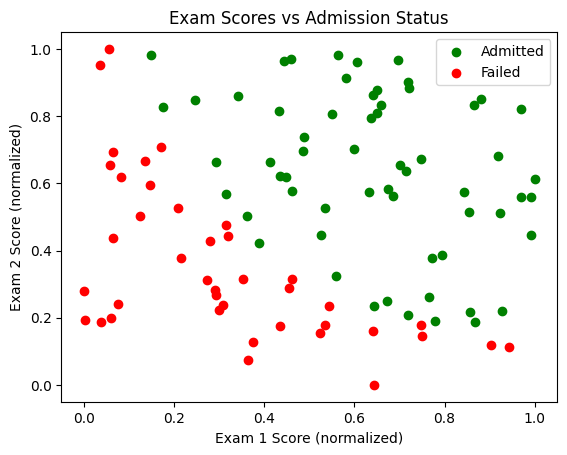

In [154]:
import matplotlib.pyplot as plt

plt.scatter(admitted['exam_1'], admitted['exam_2'], color='green', label='Admitted')
plt.scatter(failed['exam_1'], failed['exam_2'], color='red', label='Failed')
plt.xlabel('Exam 1 Score (normalized)')
plt.ylabel('Exam 2 Score (normalized)')
plt.legend()
plt.title('Exam Scores vs Admission Status')
plt.show()


# **Implementation of Logistic Regression from scratch**

---



In [155]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5
    cost = - (1/m) * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):

        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (y - h))
        theta += alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Iteration {i}: Cost {cost}')

    return theta, cost_history

In [158]:
X = data[['exam_1', 'exam_2']].values
y = data['admitted'].values.reshape(-1, 1)
m = len(y)

X = np.hstack((np.ones((m, 1)), X))
n = X.shape[1]
alpha = 0.1
num_iterations = 100000

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

Iteration 0: Cost [[0.20348332]]
Iteration 100: Cost [[0.20348332]]
Iteration 200: Cost [[0.20348332]]
Iteration 300: Cost [[0.20348332]]
Iteration 400: Cost [[0.20348332]]
Iteration 500: Cost [[0.20348332]]
Iteration 600: Cost [[0.20348332]]
Iteration 700: Cost [[0.20348332]]
Iteration 800: Cost [[0.20348332]]
Iteration 900: Cost [[0.20348332]]
Iteration 1000: Cost [[0.20348332]]
Iteration 1100: Cost [[0.20348332]]
Iteration 1200: Cost [[0.20348332]]
Iteration 1300: Cost [[0.20348332]]
Iteration 1400: Cost [[0.20348332]]
Iteration 1500: Cost [[0.20348332]]
Iteration 1600: Cost [[0.20348332]]
Iteration 1700: Cost [[0.20348332]]
Iteration 1800: Cost [[0.20348332]]
Iteration 1900: Cost [[0.20348332]]
Iteration 2000: Cost [[0.20348332]]
Iteration 2100: Cost [[0.20348332]]
Iteration 2200: Cost [[0.20348332]]
Iteration 2300: Cost [[0.20348332]]
Iteration 2400: Cost [[0.20348332]]
Iteration 2500: Cost [[0.20348332]]
Iteration 2600: Cost [[0.20348332]]
Iteration 2700: Cost [[0.20348332]]
Iter

In [159]:
cost_history = np.array(cost_history).flatten()

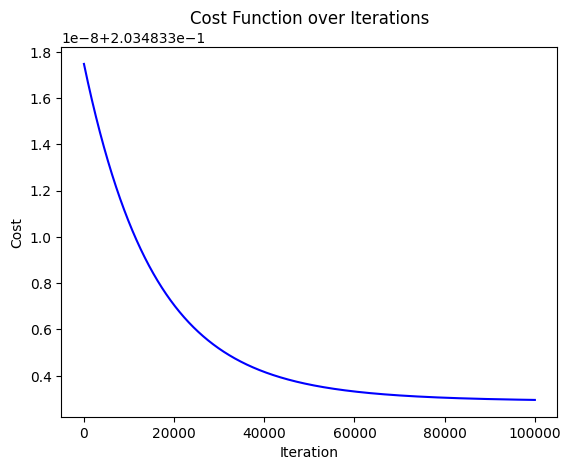

In [160]:
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

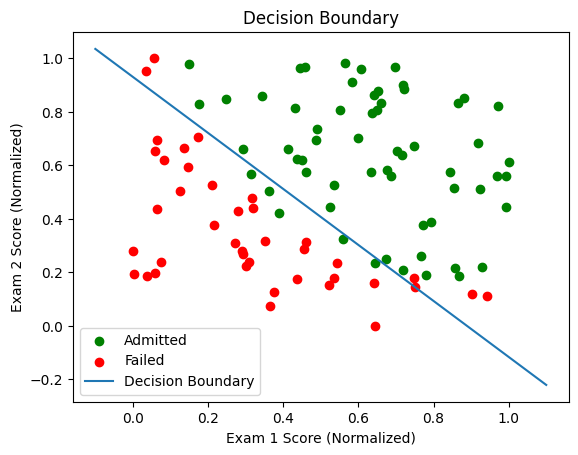

In [161]:
plt.scatter(admitted['exam_1'], admitted['exam_2'], color='green', label='Admitted')
plt.scatter(failed['exam_1'], failed['exam_2'], color='red', label='Failed')

x_values = [np.min(X[:,1])-0.1, np.max(X[:,1])+0.1]
y_values = - (theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Exam 1 Score (Normalized)')
plt.ylabel('Exam 2 Score (Normalized)')
plt.legend()
plt.title('Decision Boundary')
plt.show()

In [162]:
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

In [163]:
from sklearn.metrics import accuracy_score

y_pred_train = predict(X, theta)
y_actual_train = y.flatten()
training_accuracy = accuracy_score(y_actual_train, y_pred_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 89.00%


In [164]:
def normalize_test_point(x1, x2, x1_min, x1_max, x2_min, x2_max):
    x1_norm = (x1 - x1_min) / (x1_max - x1_min)
    x2_norm = (x2 - x2_min) / (x2_max - x2_min)
    return [1, x1_norm, x2_norm]

test_points = [
    {'exam_1': 55, 'exam_2': 70, 'expected': 1},
    {'exam_1': 40, 'exam_2': 60, 'expected': 0}
]

for point in test_points:
    X_test = np.array(normalize_test_point(
        point['exam_1'], point['exam_2'],
        exam1_min, exam1_max, exam2_min, exam2_max
    )).reshape(1, -1)

    prediction = predict(X_test, theta)[0]
    print(f"Student with scores ({point['exam_1']}, {point['exam_2']}) - Predicted: {prediction}, Expected: {point['expected']}")


Student with scores (55, 70) - Predicted: 1, Expected: 1
Student with scores (40, 60) - Predicted: 0, Expected: 0


# **Logistic Regression using library**

In [167]:
from sklearn.linear_model import LogisticRegression

y = data['admitted'].values.ravel()

model = LogisticRegression()
model.fit(X, y)

y_pred_train = model.predict(X)
training_accuracy = accuracy_score(y, y_pred_train)
print(f"Training Accuracy using scikit-learn: {training_accuracy * 100:.2f}%")


test_points = [
    {'exam_1': 55, 'exam_2': 70, 'expected': 1},
    {'exam_1': 40, 'exam_2': 60, 'expected': 0}
]

for point in test_points:
    X_test = np.array(normalize_test_point(point['exam_1'], point['exam_2'], exam1_min, exam1_max, exam2_min, exam2_max)).reshape(1, -1)
    prediction = model.predict(X_test)[0]
    print(f"Student with scores ({point['exam_1']}, {point['exam_2']}) - Predicted: {prediction}, Expected: {point['expected']}")

Training Accuracy using scikit-learn: 93.00%
Student with scores (55, 70) - Predicted: 1, Expected: 1
Student with scores (40, 60) - Predicted: 0, Expected: 0
